<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="200" height="400" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Claudia Estefania Meza Fonseca y Gerardo Gonzalez Flores

**Fecha:** 23 de Noviembre 2021.

**Expediente** :  y if729930 .
**Profesor:** Oscar David Jaramillo Zuluaga.
    

# Tarea 8

# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de comparar con los resultados teoricos del método de valuación de Black-Scholes (ecuación del principio de clase)

In [1]:
#Librerías
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
from datetime import datetime, date
from math import log, sqrt, pi, exp
from scipy.stats import norm
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [5]:
#Estudiante 1 : Claudia Estefanía Meza
import yfinance as yf

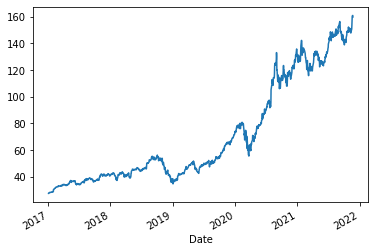

In [29]:
ticker = yf.download('AAPL', 
                      start='2017-01-01', 
                      progress=False)
closes = ticker['Adj Close']
closes.plot()

In [30]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

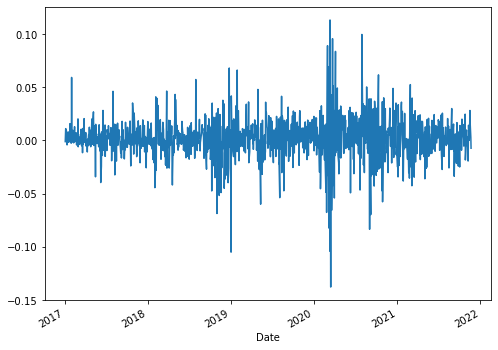

In [31]:
ret_aapl = calc_daily_ret(closes)
ret_aapl.plot(figsize=(8,6));

In [36]:
# Obtenemos el rendimiento simple
Ri = closes.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()
sigma_R = Ri.std()
Ri

Date
2017-01-04   -0.001119
2017-01-05    0.005085
2017-01-06    0.011148
2017-01-09    0.009160
2017-01-10    0.001008
                ...   
2021-11-17    0.016490
2021-11-18    0.028536
2021-11-19    0.016976
2021-11-22    0.002927
2021-11-23   -0.007297
Name: Adj Close, Length: 1232, dtype: float64

In [37]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-01-21'

nscen = 10000
dates = pd.date_range(start=today, end=expiry, freq='B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06', '2021-12-07', '2021-12-08',
                '2021-12-09', '2021-12-10', '2021-12-13', '2021-12-14',
                '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
                '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30',
                '2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
                '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
                '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-17',
                '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21'],
               dtype='datetime64[ns]', freq='B'),
 44)

In [38]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-11-23,-3.238364e-02,-2.983922e-03,1.247224e-02,-1.274369e-02,8.514689e-03,6.091612e-04,-1.605772e-03,4.802342e-03,4.057587e-03,1.684509e-02,...,-7.522390e-03,-1.519561e-02,-3.047196e-02,5.140568e-03,-7.462454e-03,4.533577e-03,8.543057e-03,-3.149784e-03,-4.060362e-02,-4.699418e-02
2021-11-24,-5.688435e-04,-1.110313e-05,-2.555409e-04,-2.165304e-04,-1.571643e-05,1.142666e-05,1.657840e-05,-1.515526e-04,3.044293e-05,-2.863981e-04,...,-3.228754e-04,6.206331e-04,-1.026237e-03,-6.164595e-05,-7.332223e-05,-6.206979e-05,9.719086e-05,-8.115459e-05,1.091777e-04,4.311242e-05
2021-11-25,-1.674924e-05,-1.330198e-07,-1.731028e-06,1.404577e-06,-2.443732e-07,-3.708589e-08,2.131420e-07,3.451865e-06,6.651714e-08,6.389526e-06,...,2.262180e-06,-6.010246e-06,-9.575037e-06,1.908725e-06,8.255548e-07,-2.451864e-07,1.059929e-06,2.011124e-06,-8.818650e-07,4.709138e-07
2021-11-26,-2.352253e-07,-4.281655e-09,-4.206358e-08,-2.131554e-08,-3.097649e-09,1.623941e-11,2.484969e-09,-6.767152e-08,-1.162452e-09,-1.185142e-07,...,-5.947861e-08,9.889987e-09,1.096308e-07,-2.885665e-08,-1.195002e-09,7.680898e-09,8.454037e-09,3.749557e-08,7.312938e-10,3.787305e-09
2021-11-29,-1.539518e-09,1.326749e-10,-6.200020e-10,6.818838e-10,-1.279460e-10,1.269376e-13,-1.870311e-11,-1.637317e-09,-1.097697e-11,-4.326810e-09,...,-1.182242e-09,3.596715e-10,3.020790e-09,-1.066228e-11,2.270466e-11,8.013901e-11,2.109406e-10,-6.088703e-10,-1.046652e-11,9.623638e-11
2021-11-30,-6.647189e-11,6.527977e-12,-1.597742e-11,6.647051e-12,5.429370e-13,7.692201e-16,-5.552338e-13,5.122751e-11,1.183004e-13,1.076495e-10,...,-1.934762e-11,-5.139523e-13,-6.820795e-11,-2.100044e-13,-2.607655e-13,-3.735425e-13,2.261467e-12,2.285983e-11,4.796451e-13,-1.873245e-12
2021-12-01,2.336329e-12,1.035607e-13,8.337022e-14,6.748426e-14,-2.046529e-14,6.175808e-18,8.012513e-15,-1.632098e-13,-3.684057e-16,-1.434505e-12,...,4.916447e-13,-8.035001e-16,-1.570295e-12,-3.424969e-15,1.086260e-15,6.589787e-15,8.202317e-14,1.598341e-13,-1.078466e-14,-2.739288e-14
2021-12-02,-6.354878e-14,-2.604981e-16,-1.677086e-16,-1.675648e-15,-5.903400e-16,-1.746664e-19,-2.481323e-16,8.549558e-16,-5.765987e-18,5.981072e-15,...,5.244581e-15,9.563739e-18,2.881895e-14,-4.495169e-17,-7.290925e-18,9.342278e-18,4.328916e-16,-4.778198e-15,-1.011887e-16,-2.283450e-16
2021-12-03,-1.334612e-15,-5.386064e-18,-3.191044e-19,5.399330e-17,4.638680e-18,4.526668e-22,-9.352336e-19,-1.099210e-17,-5.478897e-21,-1.362353e-16,...,4.818189e-17,1.905144e-21,6.897006e-16,3.848244e-19,7.195295e-20,-4.161038e-19,-2.198386e-17,3.408210e-17,1.813776e-19,6.147977e-18
2021-12-06,7.900375e-18,8.821712e-20,-1.651734e-22,7.339009e-19,-5.152077e-20,-1.881015e-24,-1.268908e-20,-3.175899e-20,-7.291745e-23,2.405432e-18,...,-1.583019e-18,1.580450e-23,-3.339211e-17,-6.188165e-22,-1.740084e-21,3.797414e-21,-5.283550e-20,9.535102e-19,5.480212e-22,-1.094705e-19


In [40]:
S_0 = closes.iloc[-1]
S_T = S_0*(1+Ri_dt).cumprod()

In [52]:
#Rendimiento Logarítmico:

ri = calc_daily_ret(closes)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()
sigma_r = ri.std()

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes.iloc[-1]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
error = np.abs(S_T-S_T2).mean().mean()
error

5.6897634352055535

Con este error podemos ver que no habrá tanta discrepancia entre el real y el estimado

$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 

In [53]:
mu = ret_aapl.mean()
sigma = ret_aapl.std()

In [54]:
r = 0.0018/360 # Tasa diaria
strike=100 #strikeprice
fecha = date.today()
nscen = 100
dates = pd.date_range(start= fecha, periods = ndays)
ndays = len(dates)
S0 = closes.iloc[-1]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
sim_closes


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2021-11-23,151.427036,155.050416,163.432880,165.775088,157.778293,157.686736,157.139303,160.084841,160.203812,161.606335,...,159.446787,161.030834,162.490814,162.920962,155.733990,162.162707,155.046148,166.371489,158.469373,158.899181
2021-11-24,151.738541,152.728315,159.266821,167.200015,152.594789,156.000358,159.237823,159.187840,157.577384,161.164858,...,164.022180,159.860427,162.052091,160.845666,153.850882,157.183628,151.932132,163.645821,159.372423,156.085329
2021-11-25,154.380579,145.093870,159.200886,166.337764,155.032489,153.119003,157.104929,158.908161,160.574706,167.456524,...,163.045578,159.293070,157.890491,160.967541,156.175929,158.290463,152.761128,170.235965,158.725019,157.088775
2021-11-26,152.284512,144.593746,156.802247,167.671390,159.879541,154.379348,160.416537,151.581508,162.089368,171.504402,...,159.376170,163.333965,156.458479,159.845888,153.348431,157.702723,156.587966,173.355418,160.589541,153.255260
2021-11-27,154.450715,139.921790,156.653233,169.833621,156.035742,152.942567,155.667672,151.582594,161.730861,172.442491,...,161.839651,167.503042,161.445977,163.159845,159.060255,158.830937,155.048971,172.755160,157.912023,157.189306
2021-11-28,151.814248,137.717573,154.165272,174.391867,156.299245,150.952348,156.839144,153.744273,162.757468,168.123975,...,158.756298,164.769045,156.146060,165.483571,160.424509,160.320448,155.796112,174.890794,162.683197,159.420651
2021-11-29,155.484679,136.002645,157.242317,173.080694,154.594564,153.739518,151.256107,150.797234,161.241979,161.832527,...,157.926903,164.545623,157.321376,166.202233,154.433622,161.156400,158.087765,169.417089,162.376081,159.830249
2021-11-30,154.150920,132.610828,153.572560,171.147360,156.567519,148.349102,154.564518,153.070610,164.831913,164.396111,...,157.524701,167.632655,156.466158,162.299557,150.322723,158.371772,160.303832,175.810601,159.247466,160.781265
2021-12-01,153.630556,129.252395,152.115378,165.915462,153.440515,149.413127,158.070820,151.379395,162.803823,159.410425,...,152.657508,163.118708,155.540303,159.710459,152.941886,156.803928,161.607594,173.805209,159.940422,160.924970
2021-12-02,153.125064,130.676524,153.957725,163.940105,156.151391,154.995085,159.571077,151.296991,164.803051,160.543959,...,152.157573,158.148085,154.387411,158.951204,155.748588,154.907915,163.010732,174.072841,159.648722,164.606941


Prima    1.726803
Name: 2022-01-05 00:00:00, dtype: float64

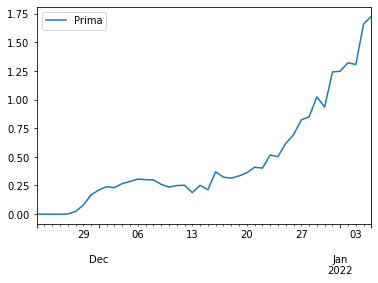

In [59]:
strike = 140

call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes, 0).mean(axis=1)}, index=dates)
call.plot();
call.iloc[-1]

In [19]:
aapl = yf.Ticker("AAPL")
opt = aapl.option_chain('2022-01-21')

In [20]:
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL220121C00025000,2021-11-19 17:19:08,25.00,135.07,134.70,135.75,0.000000,0.000000,3,94.0,2.251957,True,REGULAR,USD
1,AAPL220121C00027500,2021-11-11 17:24:00,27.50,120.60,132.50,133.40,0.000000,0.000000,8,182.0,2.293950,True,REGULAR,USD
2,AAPL220121C00028750,2021-11-05 15:11:04,28.75,122.53,131.20,132.20,0.000000,0.000000,9,130.0,2.235356,True,REGULAR,USD
3,AAPL220121C00030000,2021-11-19 19:12:01,30.00,130.75,129.70,130.80,0.000000,0.000000,1,52.0,2.048833,True,REGULAR,USD
4,AAPL220121C00031250,2021-11-04 19:53:24,31.25,119.70,128.50,129.55,0.000000,0.000000,165,39.0,2.016607,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,AAPL220121C00720000,2020-08-28 19:41:41,720.00,1035.40,319.00,324.00,1000.550050,2871.019000,19,257.0,0.000000,False,REGULAR,USD
142,AAPL220121C00740000,2020-08-28 19:54:01,740.00,31.98,30.70,31.90,-0.020000,-0.062501,55,256.0,3.569642,False,REGULAR,USD
143,AAPL220121C00800000,2020-08-28 19:29:41,800.00,304.00,300.00,305.00,279.000000,1116.000000,63,1098.0,0.000000,False,REGULAR,USD
144,AAPL220121C00900000,2020-08-28 19:26:55,900.00,18.13,17.35,18.40,0.029999,0.165739,5,NaN,3.190127,False,REGULAR,USD


In [23]:
puts=opt.puts
puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL220121P00025000,2021-10-27 17:37:08,25.00,0.01,0.00,0.01,0.00000,0.000000,1.0,1041,1.406253,False,REGULAR,USD
1,AAPL220121P00027500,2021-11-22 19:29:52,27.50,0.01,0.00,0.01,0.00000,0.000000,1.0,3509,1.312503,False,REGULAR,USD
2,AAPL220121P00028750,2021-10-14 14:15:51,28.75,0.01,0.01,0.02,0.00000,0.000000,3.0,978,1.421878,False,REGULAR,USD
3,AAPL220121P00030000,2021-11-08 14:51:12,30.00,0.01,0.00,0.02,0.00000,0.000000,10.0,11842,1.343753,False,REGULAR,USD
4,AAPL220121P00031250,2021-10-20 14:17:34,31.25,0.01,0.00,0.17,0.00000,0.000000,50.0,765,1.601564,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,AAPL220121P00620000,2020-08-24 19:58:52,620.00,11.60,2.70,3.20,-157.29999,-93.132030,NaN,241,0.000010,True,REGULAR,USD
137,AAPL220121P00640000,2020-08-24 15:41:13,640.00,11.84,2.91,3.20,-169.66000,-93.476585,NaN,583,0.000010,True,REGULAR,USD
138,AAPL220121P00660000,2020-08-24 19:58:52,660.00,14.40,3.10,3.65,-185.54001,-92.797840,3.0,618,0.000010,True,REGULAR,USD
139,AAPL220121P00680000,2020-08-24 15:35:52,680.00,14.20,3.30,3.85,-200.84000,-93.396580,82.0,3033,0.000010,True,REGULAR,USD


In [65]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(-4.249896476377041, 7.703502579133902)
(-4.1348043956636715, 7.588410498420533)


In [ ]:
#Estudiante 2